# Линеарни временски инваријантни системи

Едноставен филтер со подвижна средна вредност. Може и да се испрограмира, или да се најде неговиот импулсен одѕив, па да се употреби конволуција.

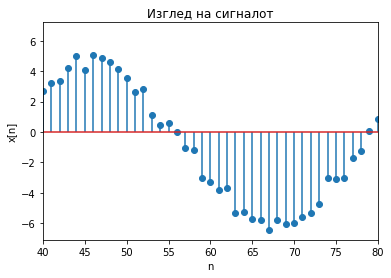

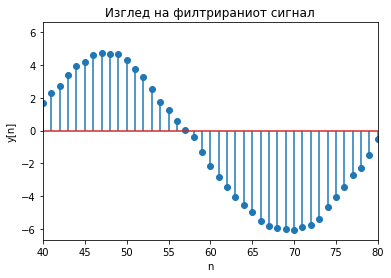

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#import math
import cmath
from scipy.fft import fft, ifft # gi zema samo ovie dve funkcii od bibliotekata

N = 128  # Должина на низата
Nf = 16 # Вкупна должина на филтерот
Mf = 4 # Должина на филтерот
n=np.asarray(list(range(0,N)))
    
g = np.zeros(Nf)
for i in range(Mf):
    g[i] = 1 / Mf # 1/М е имп. одѕив на нископролусен 

Fi = np.pi/3
Omega = np.pi / 64
x = np.zeros(N)
for i in range(N):
    x[i] = 1 * np.cos(Omega * i) + 5 * np.sin(Omega * 3 * i + Fi) + np.random.normal(loc=0, scale = 0.4)

plt.figure() # нова слика
plt.stem(n,x, use_line_collection = True)  
plt.xlabel('n')
plt.ylabel('x[n]')
plt.xlim(40, 80)
plt.title('Изглед на сигналот')
plt.show()

y = np.convolve(x, g)    
ny = np.asarray(list(range(0,len(y))))
plt.figure() # нова слика
plt.stem(ny,y, use_line_collection = True)  
plt.xlabel('n')
plt.ylabel('y[n]')
plt.xlim(40, 80)
plt.title('Изглед на филтрираниот сигнал')
plt.show()


# Филтер со интегратор со истекување

За овој филтер не го користиме неговиот импулсен одѕив, ами се програмира филтрирањето

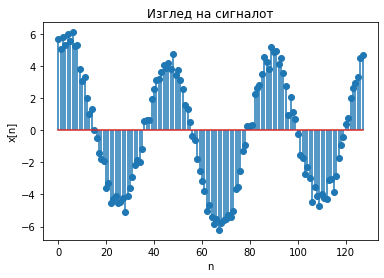

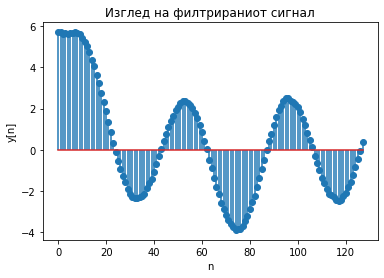

In [15]:
import numpy as np
import matplotlib.pyplot as plt
#import math
import cmath
from scipy.fft import fft, ifft # gi zema samo ovie dve funkcii od bibliotekata

N = 128  # Должина на низата
Nf = 16 # Вкупна должина на филтерот
Mf = 4 # Должина на филтерот
n=np.asarray(list(range(0,N)))

Fi = np.pi/3
Omega = np.pi / 64
x = np.zeros(N)
for i in range(N):
    x[i] = 1 * np.cos(Omega * i) + 5 * np.sin(Omega * 3 * i + Fi) + np.random.normal(loc=0, scale = 0.4)

plt.figure() # нова слика
plt.stem(n,x, use_line_collection = True)  
plt.xlabel('n')
plt.ylabel('x[n]')
#plt.xlim(40, 80)
plt.title('Изглед на сигналот')
plt.show()

# Дел за филтрирање
Lam = 0.9
y = np.zeros(N)
y[0] = x[0]
for i in range(1, N):
    y[i] = Lam * y[i - 1] + (1.0 - Lam) * x[i-1]

ny = np.asarray(list(range(0,len(y))))
plt.figure() # нова слика
plt.stem(ny,y, use_line_collection = True)  
plt.xlabel('n')
plt.ylabel('y[n]')
#plt.xlim(40, 80)
plt.title('Изглед на филтрираниот сигнал')
plt.show()
